In [1]:
import math
import numpy as np
import pandas as pd
import random as rd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def distProbZipf(n):
    zipfSerie=[1.0/(x+1) for x in range(n)]
    zipfSerieTotal=sum(zipfSerie)
    result=[z/zipfSerieTotal for z in zipfSerie]
    return result

In [4]:
def distProbXLogx(n,factor=10):
    zipfSerie=[1.0/((x+1)*math.log(x+1)+1) for x in range(n)]
    zipfMin=min(zipfSerie)
    result=[z/zipfMin*factor for z in zipfSerie]
    return result

In [5]:
def distOccZipf(n,z=1,factor=10):
    zipfSerie=[1.0/(x+1)**z for x in range(n)]
    zipfMin=min(zipfSerie)
    result=[z/zipfMin*factor for z in zipfSerie]
    return result

In [6]:
zipfCoefs=[1 for i in range(1000)]+\
          [2 for i in range(1000,10000)]+\
          [3 for i in range(10000,100000)]+\
          [4 for i in range(100000,1000000)]

In [7]:
def distZipfChunks(n,factor=10):
    zipfSerie=[1.0/(x+1)**zipfCoefs[x] for x in range(n)]
    zipfMin=min(zipfSerie)
    result=[z/zipfMin*factor for z in zipfSerie]
    return result

In [8]:
nbCases=20
nbLexemes=5000
nbFormes=nbCases*nbLexemes
print nbFormes

100000


In [9]:
bloc=10000
nbBlocs=10
nTiles=10
z=1.5
lstNbTokensTypes=[]

In [22]:
lexique=pd.DataFrame()
lexique["zipf1"]=distOccZipf(350000,factor=100)
lexique["zipf2"]=distOccZipf(350000,z=2,factor=100)
lexique["chunks"]=distZipfChunks(350000,factor=100)


# distProbXLogx(350000,factor=1),columns=["freq"]

In [26]:
lexique["freqcum"]= (lexique["zipf1"].cumsum()).astype(int)

In [27]:
lexique

,zipf1,zipf2,chunks,freqcum
0,3.500000e+07,1.225000e+13,1.500625e+24,35000000
1,1.750000e+07,3.062500e+12,7.503125e+23,52500000
2,1.166667e+07,1.361111e+12,5.002083e+23,64166666
3,8.750000e+06,7.656250e+11,3.751563e+23,72916666
4,7.000000e+06,4.900000e+11,3.001250e+23,79916666
5,5.833333e+06,3.402778e+11,2.501042e+23,85749999
6,5.000000e+06,2.500000e+11,2.143750e+23,90749999
7,4.375000e+06,1.914062e+11,1.875781e+23,95124999
8,3.888889e+06,1.512346e+11,1.667361e+23,99013888
9,3.500000e+06,1.225000e+11,1.500625e+23,102513888


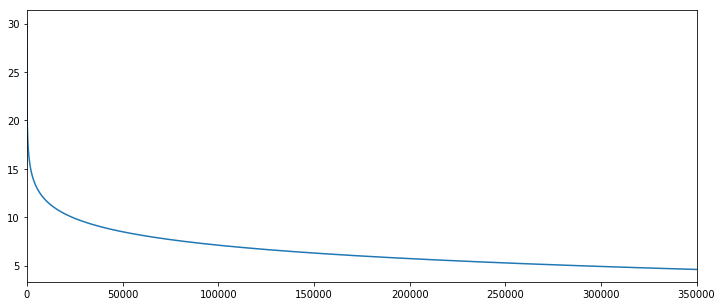

In [33]:
lexique["zipf2"].apply(math.log).plot(figsize=(12,5))

In [ ]:
rangeTop=lexique["freqcum"].max()
print rangeTop

In [ ]:
def tirage2triage(tirage,cumul=True):    
    triage=sorted(tirage)
    freqTop=-1
    indexMin=0
    tirs={}

    for num,tir in enumerate(triage[:]):
        if tir > freqTop:
            indexMin=lexique[lexique["freqcum"]>=tir][0:1].index.astype(int)[0]
            freqTop=lexique.ix[indexMin,'freqcum']
            tirs[indexMin]=0
        tirs[indexMin] += 1
        if num%500000==0:
            print num,
    print
    if cumul:
        for indexNum in tirs:
            lexique.ix[indexNum,'tir1']+=tirs[indexNum]
    else:
        lexique['tir1']=0
        for indexNum in tirs:
            lexique.ix[indexNum,'tir1']=tirs[indexNum]

In [ ]:
bloc=1000000
nbBlocs=1000
nTiles=10

portion=(nbBlocs*bloc)//nTiles
print portion

In [ ]:
tirage=[]
for n in range(nbBlocs*bloc):
    tirage.append(rd.randrange(rangeTop))

In [ ]:
lexique["tir1"]=0

In [ ]:
nbTokensTypes={}
for nTile in range(nTiles):
#     if nTile==9: print sorted(tirage[nTile*portion:(nTile+1)*portion])
    tirage2triage(tirage[nTile*portion:(nTile+1)*portion],True)
    print
    print "nTile",nTile
    tokens=lexique[lexique["tir1"]!=0]["tir1"].sum()
    types=lexique[lexique["tir1"]!=0]["tir1"].count()
    print tokens
    print types
    nbTokensTypes[tokens]=types
lstNbTokensTypes.append(nbTokensTypes)


In [ ]:
dfTokensTypes=pd.DataFrame(lstNbTokensTypes).T

In [ ]:
dfTokensTypes.to_excel("test.xlsx")

In [ ]:
dfTokensTypes

In [ ]:
dfTokensTypes.plot()